###Read file with scored words

In [2]:
project_path = '/Users/lgaza/Dropbox/ZaMSZ/SentimentAnalysis'

In [3]:
import sys
sys.path.insert(1, project_path)

In [4]:
input_file_path = '{}/data/labMT.csv'.format(project_path)


In [5]:
from input import words
from input import gutenberg_input, file_input
from analysis import slice_generator
from analysis.distance import distance_analysis
from analysis.sentence import sentence_analysis
from analysis.slice import slice_analysis

In [6]:
scored_input_words_df = words.ScoredInputWords(input_file_path)

In [7]:
books = {
    'john_milton_paradise_lost': gutenberg_input.GutenbergInput('milton-paradise.txt', 'john_milton', 'paradise_lost'),
    'herman_melville_moby_dick': gutenberg_input.GutenbergInput('melville-moby_dick.txt', 'herman_melville', 'moby_dick'),
    'william_shakespeare_macbeth': gutenberg_input.GutenbergInput('shakespeare-macbeth.txt', 'william_shakespeare', 'macbeth'),
    'james_joyce_ulysses': file_input.FileInput('{}/data/books/4300-0.txt'.format(project_path), 'james_joyce', 'ulysses'),
    'murray_leinster_the_world_is_taboo': file_input.FileInput('{}/data/books/pg18172.txt'.format(project_path), 'murray_leinster', 'this_world_is_taboo'),
    'dave_eggers_a_heartbreaking_work_of_staggering_genius': file_input.FileInput('{}/data/books/AHeartbreakingWorkOfStaggeringGenius_DEggers/a_heartbreaking_work_of_staggering_genius.txt'.format(project_path), 'dave_eggers', 'a_heartbreaking_work_of_staggering_genius'),
    'toni_morrison_beloved': file_input.FileInput('{}/data/books/Beloved_TMorrisson/t.morrison_-_beloved.txt'.format(project_path), 'toni_morrison', 'beloved'),
    'joseph_heller_catch_22': file_input.FileInput('{}/data/books/Catch22_JHeller/catch_22.txt'.format(project_path), 'joseph_heller', 'catch_22'),
    'margaret_mitchell_gone_with_the_wind': file_input.FileInput('{}/data/books/GoneWithTheWind/GoneWithTheWind.txt'.format(project_path), 'margaret_mitchell', 'gone_with_the_wind'),
    'jane_austen_pride_and_prejudice': file_input.FileInput('{}/data/books/PrideAndPrejudice/pride.txt'.format(project_path), 'jane_austen', 'pride_and_prejudice'),
    'daniel_defoe_robinson_cruzoe': file_input.FileInput('{}/data/books/RobinsonCruzoe/robinson.txt'.format(project_path), 'daniel_defoe', 'robinson_cruzoe'),
    'virginia_woolf_the_voyage_out': file_input.FileInput('{}/data/books/The_voyage_VirginiaWoolf/v.woolf_-_the_voyage_out.txt'.format(project_path), 'virginia_woolf', 'the_voyage_out'),
    'virginia_woolf_the_years': file_input.FileInput('{}/data/books/The_years_VirginiaWoolf/v.woolf_-_the_years.txt'.format(project_path), 'virginia_woolf', 'the_years'),
    'arthur_conan_doyle_the_adventures_of_sherlock_holmes': file_input.FileInput('{}/data/books/TheAdventuresOdSherlockHolmes/TheAdventuresOfSherlockHolmes.txt'.format(project_path), 'arthur_conan_doyle', 'the_adventures_of_sherlock_holmes'),
    'henry_james_the_ambassadors': file_input.FileInput('{}/data/books/TheAmbassadors/TheAmbassadors.txt'.format(project_path), 'henry_james', 'the_ambassadors'),
    'virginia_woolf_the_waves': file_input.FileInput('{}/data/books/Waves_VirginiaWoolf/waves_tekst.txt'.format(project_path), 'virginia_woolf', 'the_waves'),
    'william_shakespear_the_winters_tale': file_input.FileInput('{}/data/books/pg2248.txt'.format(project_path), 'william_shakespear', 'the_winters_tale'),
    'james_joyce_finnegans_wake': file_input.FileInput('{}/data/books/j.joyce_-_finnegans_wake.txt'.format(project_path), 'james_joyce', 'finnegans_wake'),
    'marcel_proust_swanns_way': file_input.FileInput('{}/data/books/0300511.txt'.format(project_path), 'marcel_proust', 'swanns_way'),
    'marcel_proust_within_a_budding_grove': file_input.FileInput('{}/data/books/0300401.txt'.format(project_path), 'marcel_proust', 'within_a_budding_grove'),
    'marcel_proust_the_guermantes_way': file_input.FileInput('{}/data/books/0300411.txt'.format(project_path), 'marcel_proust', 'the_guermantes_way'),
    'marcel_proust_cities_of_the_plain': file_input.FileInput('{}/data/books/0300491.txt'.format(project_path), 'marcel_proust', 'cities_of_the_plain'),
    'marcel_proust_the_captive': file_input.FileInput('{}/data/books/0300501.txt'.format(project_path), 'marcel_proust', 'the_captive'),
    'marcel_proust_the_sweet_cheat_gone': file_input.FileInput('{}/data/books/0300541.txt'.format(project_path), 'marcel_proust', 'the_sweet_cheat_gone'),
    'marcel_proust_time_regained': file_input.FileInput('{}/data/books/0300691.txt'.format(project_path), 'marcel_proust', 'time_regained'),
    'michael_jackson_billie_jean': file_input.FileInput('{}/data/books/billie_jean.txt'.format(project_path), 'michael_jackson', 'billie_jean')
}

In [8]:
proust = books['marcel_proust_swanns_way']

In [9]:
pride_and_prejudice = books['jane_austen_pride_and_prejudice']

In [10]:
SLICE_SIZE=100
slice_generator_obj = slice_generator.SliceGenerator(SLICE_SIZE)

In [20]:
#scores = slice_analysis.SumScoredByScoredCountAnalysisNoNeutralWords(proust)
#scores = distance_analysis.DistanceToPreviousWordWithSentimentAnalysis(pride_and_prejudice)
#scores = slice_analysis.NumberOfWordsWithSentimentPerSliceAnalysis(pride_and_prejudice)
scores = sentence_analysis.SumScoredByScoredCountPerSentenceAnalysisNoNeutralWords(pride_and_prejudice)
books_scores = scores.score(SLICE_SIZE, scored_input_words_df)

In [21]:
print("min: ", min(books_scores))
print("max: ", max(books_scores))
print("avg: ", sum(books_scores)/len(books_scores))

min:  0
max:  8.42
avg:  5.7126801432689716


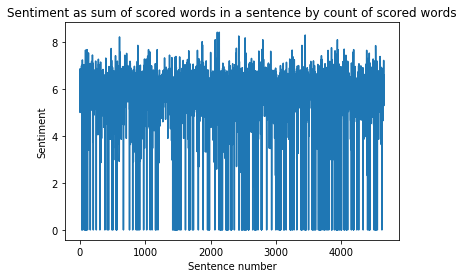

In [22]:
scores.plot()

In [16]:
results_path = '{}/outputs'.format(project_path)